1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:

!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.1.0
blinker                          1.4
bl

In [ ]:
import tensorflow as tf
import os

In [ ]:

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2. Remove dodgy images

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/imageclassificaion/DATA'

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

happy
sad


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

what-makes-people-happy.jpeg
images26.jpg
images35.jpg
image30.jpeg
image26.jpeg
image22.jpeg
images27.jpg
habits-of-happy-people.jpg
image14.jpeg
images16.jpg
image29.jpeg
image24.jpeg
images36.jpg
HappyPeopleBanner.png
images32.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
THPC_Logo-jpeg.jpg
images30.jpg
images22.jpg
image25.jpeg
image10.jpeg
960x0.jpg
happy-people-vector-29209040.jpg
How_Happy_Are_People_at_Work.jpg
Travis-Bradberry-Happy.jpg
170404-happy-workers-feature.jpg
hqdefault.jpg
7-Habits-of-Happy-People-image.jpeg
image13.jpeg
1902540.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
happy-people-group-fb.jpg
images24.jpg
getty_478389113_970647970450091_99776.jpg
images.jpg
_happy_jumping_on_beach-40815.jpg
05-12-21-happy-people.jpg
image6.jpeg
happiness.jpg
images17.jpg
happy-people_1463241208.jpg
Happy-people-800x533.jpg
maxresdefault2.jpg
image3.jpeg
How-to-Be-Happy_1200x628-facebook.jpg
Happiness-Habits-10-Things-Happy-People-Do-Before-Bed.

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        print(image_path)

/content/drive/MyDrive/imageclassificaion/DATA/happy/what-makes-people-happy.jpeg
/content/drive/MyDrive/imageclassificaion/DATA/happy/images26.jpg
/content/drive/MyDrive/imageclassificaion/DATA/happy/images35.jpg
/content/drive/MyDrive/imageclassificaion/DATA/happy/image30.jpeg
/content/drive/MyDrive/imageclassificaion/DATA/happy/image26.jpeg
/content/drive/MyDrive/imageclassificaion/DATA/happy/image22.jpeg
/content/drive/MyDrive/imageclassificaion/DATA/happy/images27.jpg
/content/drive/MyDrive/imageclassificaion/DATA/happy/habits-of-happy-people.jpg
/content/drive/MyDrive/imageclassificaion/DATA/happy/image14.jpeg
/content/drive/MyDrive/imageclassificaion/DATA/happy/images16.jpg
/content/drive/MyDrive/imageclassificaion/DATA/happy/image29.jpeg
/content/drive/MyDrive/imageclassificaion/DATA/happy/image24.jpeg
/content/drive/MyDrive/imageclassificaion/DATA/happy/images36.jpg
/content/drive/MyDrive/imageclassificaion/DATA/happy/HappyPeopleBanner.png
/content/drive/MyDrive/imageclassific

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [ ]:
b=cv2.imread(os.path.join('/content/drive/MyDrive/imageclassificaion/DATA','/content/drive/MyDrive/imageclassificaion/DATA/happy','960x0.jpg'))
print(b)

[[[253 252 248]
  [253 252 248]
  [253 252 248]
  ...
  [255 253 253]
  [255 253 253]
  [255 253 253]]

 [[253 252 248]
  [253 252 248]
  [253 252 248]
  ...
  [255 253 253]
  [255 253 253]
  [255 253 253]]

 [[253 252 248]
  [253 252 248]
  [253 252 248]
  ...
  [255 253 253]
  [255 253 253]
  [255 253 253]]

 ...

 [[ 75 103 120]
  [123 151 168]
  [133 161 178]
  ...
  [133 163 204]
  [135 163 204]
  [135 163 204]]

 [[ 99 127 144]
  [125 153 170]
  [123 151 168]
  ...
  [132 162 203]
  [134 162 203]
  [134 162 203]]

 [[130 158 175]
  [151 179 196]
  [148 176 193]
  ...
  [132 162 203]
  [134 162 203]
  [134 162 203]]]


In [ ]:
type(b),b.shape

(numpy.ndarray, (640, 960, 3))

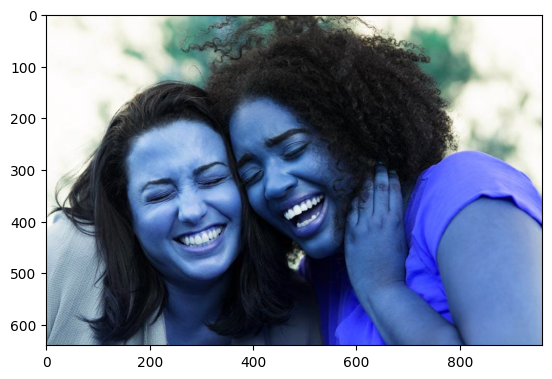

In [ ]:
plt.imshow(b)

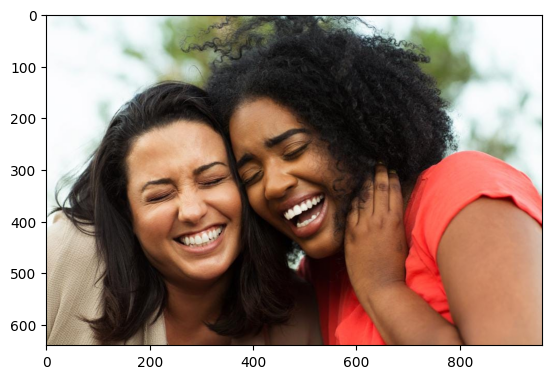

In [ ]:
plt.imshow(cv2.cvtColor(b,cv2.COLOR_BGR2RGB))

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
print('Image not in ext list {}'.format(image_path))

Image not in ext list /content/drive/MyDrive/imageclassificaion/DATA/sad/sadness.jpg


In [ ]:
print('Issue with image {}'.format(image_path))

Issue with image /content/drive/MyDrive/imageclassificaion/DATA/sad/sadness.jpg


3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/imageclassificaion/DATA')

Found 305 files belonging to 2 classes.


In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
batch

(array([[[[252.51416   , 248.51416   , 221.51416   ],
          [251.78906   , 248.39062   , 218.1875    ],
          [251.85156   , 248.85156   , 216.64014   ],
          ...,
          [252.57446   , 247.77393   , 218.77393   ],
          [249.55981   , 246.53735   , 218.33423   ],
          [253.        , 249.        , 222.        ]],
 
         [[252.61938   , 248.61938   , 219.61938   ],
          [251.67725   , 247.67725   , 218.67725   ],
          [249.18115   , 245.25464   , 216.63257   ],
          ...,
          [253.75928   , 250.28418   , 221.80908   ],
          [252.32324   , 248.71802   , 219.71802   ],
          [253.        , 249.        , 220.        ]],
 
         [[252.16406   , 249.16406   , 218.16406   ],
          [252.14673   , 248.14673   , 220.34985   ],
          [254.896     , 250.57056   , 226.50537   ],
          ...,
          [252.72363   , 248.74438   , 223.70288   ],
          [252.81201   , 248.81201   , 221.01514   ],
          [253.        , 249.  

In [ ]:
len(batch)

2

In [ ]:
batch[0]

array([[[[252.51416   , 248.51416   , 221.51416   ],
         [251.78906   , 248.39062   , 218.1875    ],
         [251.85156   , 248.85156   , 216.64014   ],
         ...,
         [252.57446   , 247.77393   , 218.77393   ],
         [249.55981   , 246.53735   , 218.33423   ],
         [253.        , 249.        , 222.        ]],

        [[252.61938   , 248.61938   , 219.61938   ],
         [251.67725   , 247.67725   , 218.67725   ],
         [249.18115   , 245.25464   , 216.63257   ],
         ...,
         [253.75928   , 250.28418   , 221.80908   ],
         [252.32324   , 248.71802   , 219.71802   ],
         [253.        , 249.        , 220.        ]],

        [[252.16406   , 249.16406   , 218.16406   ],
         [252.14673   , 248.14673   , 220.34985   ],
         [254.896     , 250.57056   , 226.50537   ],
         ...,
         [252.72363   , 248.74438   , 223.70288   ],
         [252.81201   , 248.81201   , 221.01514   ],
         [253.        , 249.        , 220.        ]],

In [ ]:
batch[1]

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int32)

In [ ]:
batch[0].shape,batch[1].shape

((32, 256, 256, 3), (32,))

In [ ]:
c= tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/imageclassificaion/DATA',batch_size=8, image_size=(128,128))

Found 305 files belonging to 2 classes.


Trying to change the batches from 32 to 8 to check how the data is working

In [ ]:
data_iterat = c.as_numpy_iterator()

In [ ]:
batc = data_iterat.next()

In [ ]:
batc[0].shape,batc[1].shape

((8, 128, 128, 3), (8,))

FUN MOMENT IS DONE OF CROSSCHECKING NOW LETS GO TO THE WORK

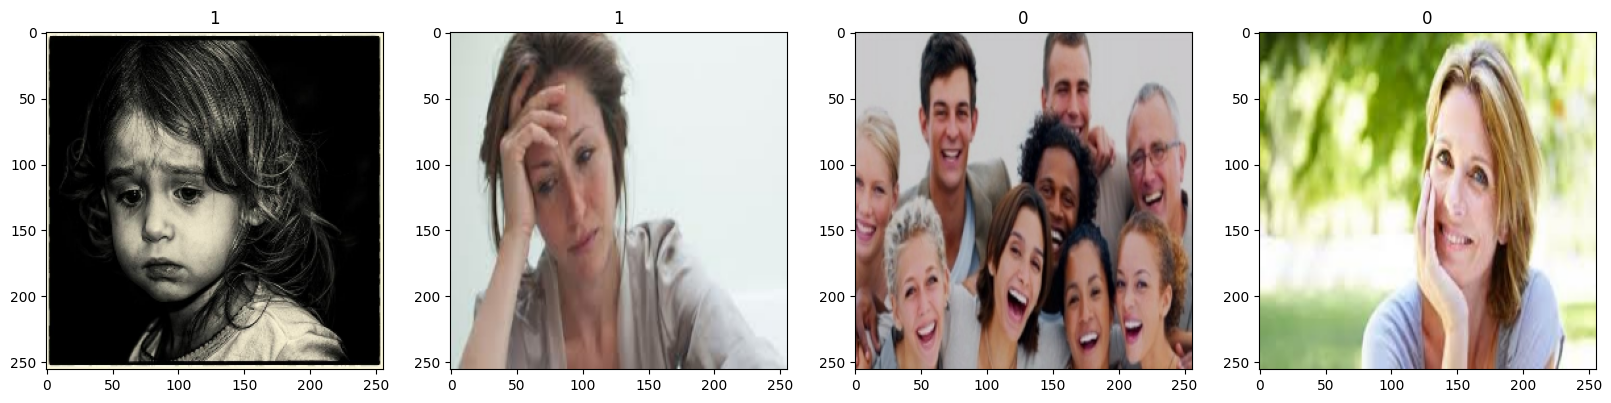

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# where '0 ' represented that's a happy people and '1' are not happy people

In [ ]:
scaled = batch[0]/255

In [ ]:
scaled.max()

1.0

In [ ]:
scaled.min()

0.0

4. Scale Data

In [ ]:

data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

again cross checking data.as_numpy_iterator().next() with this

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch=scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

In [ ]:
batch[0].min()

0.0

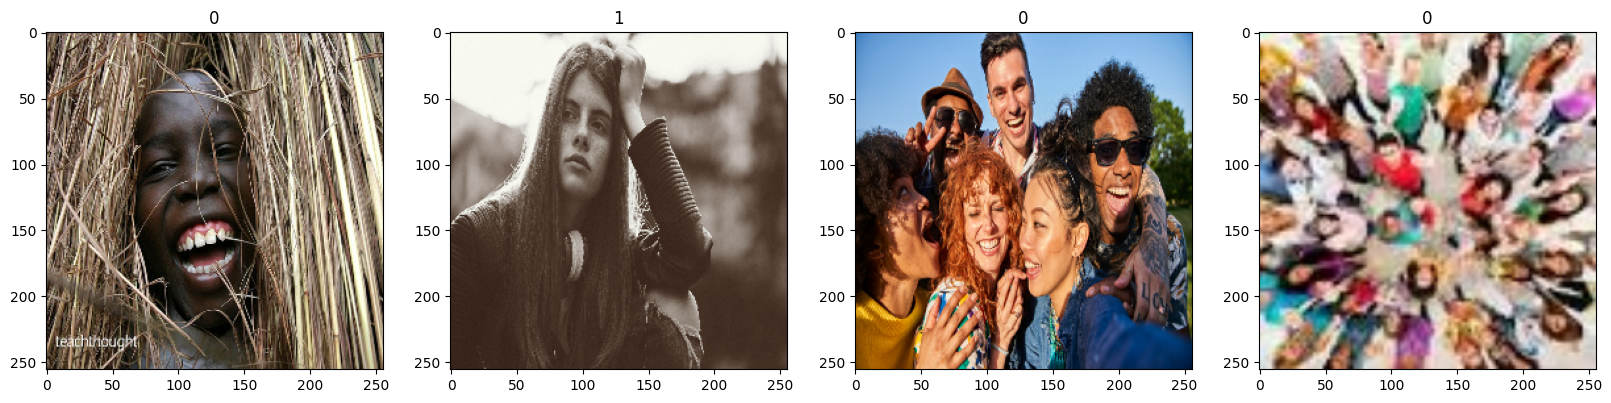

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
data.as_numpy_iterator().next()[0].min()

0.0

5. Split Data

In [ ]:
len(data)

10

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size,val_size,test_size

(7, 2, 1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train),len(val),len(test)

(7, 2, 1)

6. Build Deep Learning Model

In [ ]:

train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:

model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 [==============================] - 9s 566ms/step - loss: 0.8084 - accuracy: 0.4866 - val_loss: 0.6582 - val_accuracy: 0.7656
Epoch 2/20
7/7 [==============================] - 6s 537ms/step - loss: 0.6234 - accuracy: 0.6473 - val_loss: 0.5800 - val_accuracy: 0.7656
Epoch 3/20
7/7 [==============================] - 7s 746ms/step - loss: 0.5629 - accuracy: 0.7366 - val_loss: 0.5411 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 6s 531ms/step - loss: 0.4932 - accuracy: 0.7991 - val_loss: 0.5695 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 7s 759ms/step - loss: 0.4128 - accuracy: 0.8527 - val_loss: 0.3486 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 8s 913ms/step - loss: 0.2845 - accuracy: 0.9107 - val_loss: 0.1999 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 7s 652ms/step - loss: 0.2295 - accuracy: 0.9152 - val_loss: 0.1818 - val_accuracy: 0.9219
Epoch 8/20
7/7 [====

8. Plot Performance

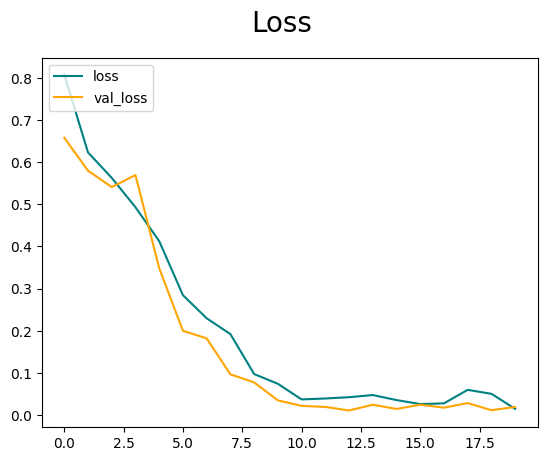

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

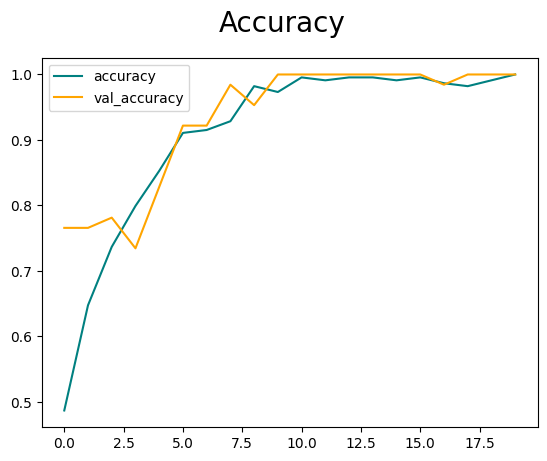

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 76ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


10. Test

In [ ]:

import cv2

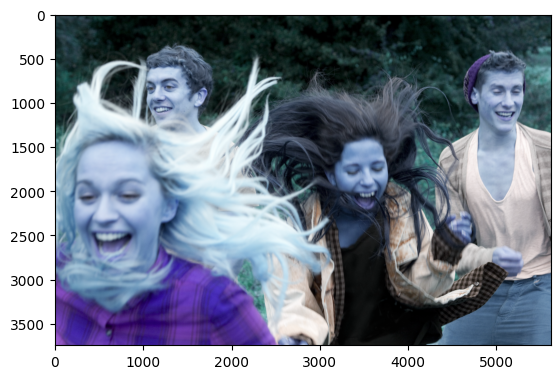

In [ ]:
img = cv2.imread('/content/drive/MyDrive/imageclassificaion/154006829.jpg')
plt.imshow(img)
plt.show()

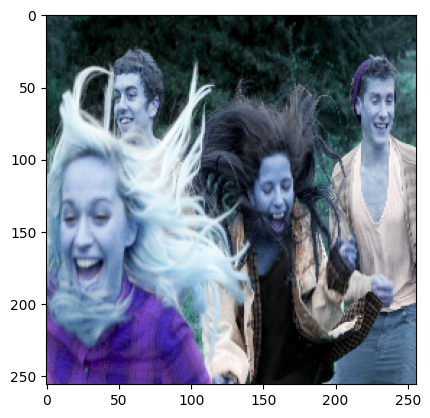

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [ ]:

yhat

array([[0.00131296]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save(os.path.join('/content/drive/MyDrive/imageclassificaion','models','imageclassifier.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/drive/MyDrive/imageclassificaion/models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 70ms/step


array([[0.00131296]], dtype=float32)